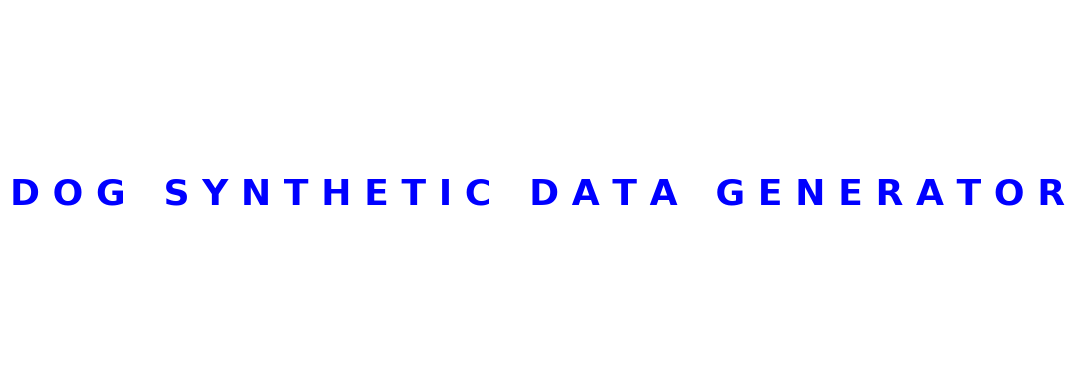

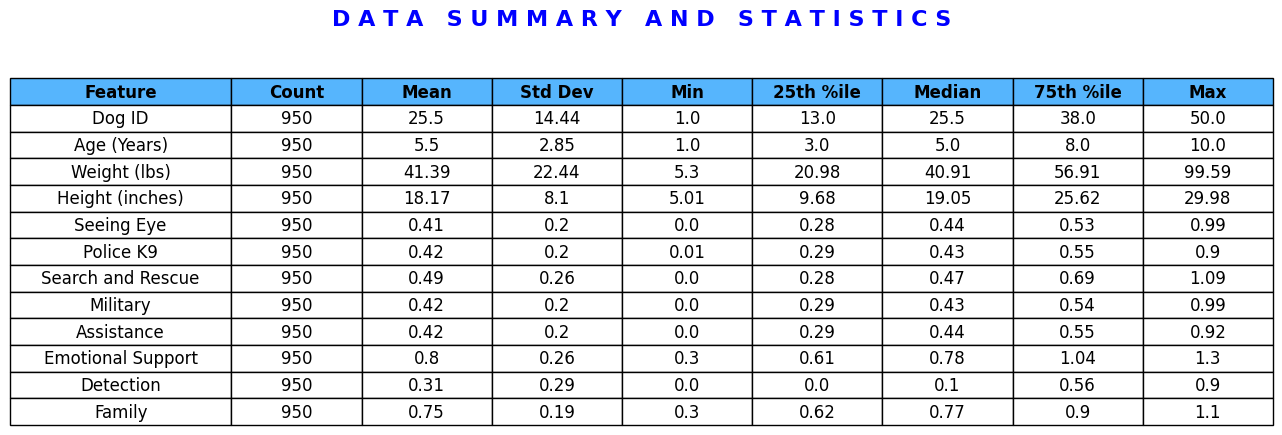

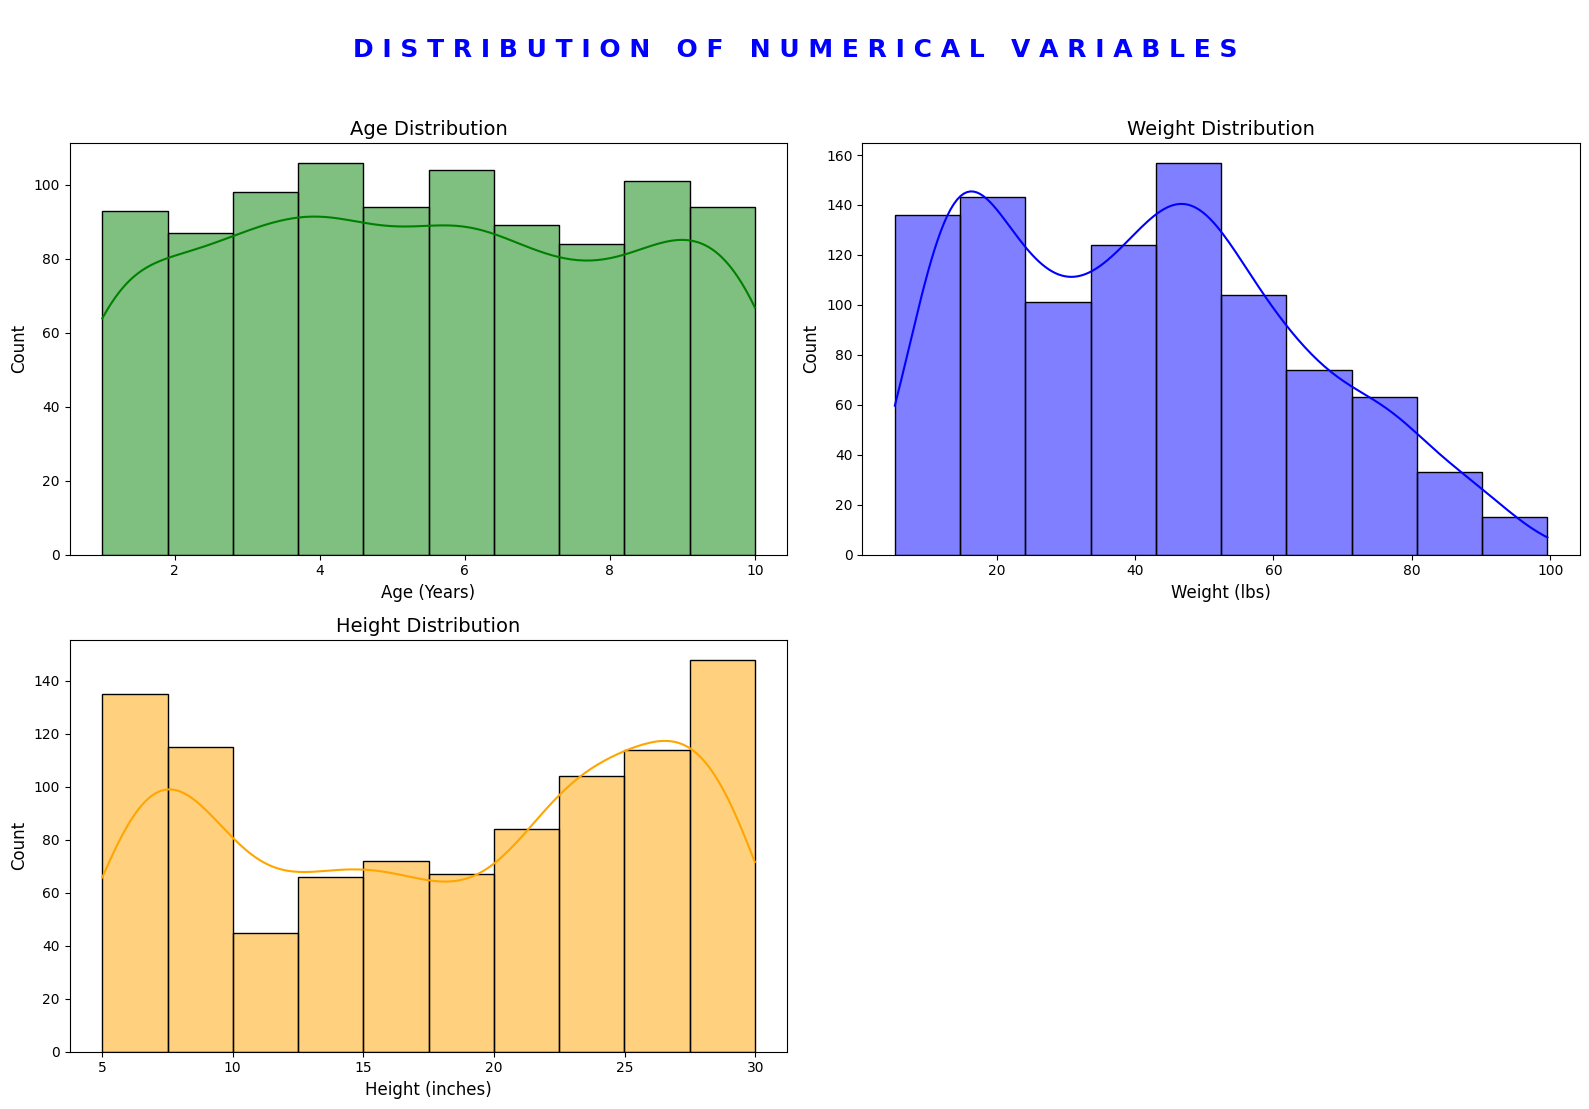

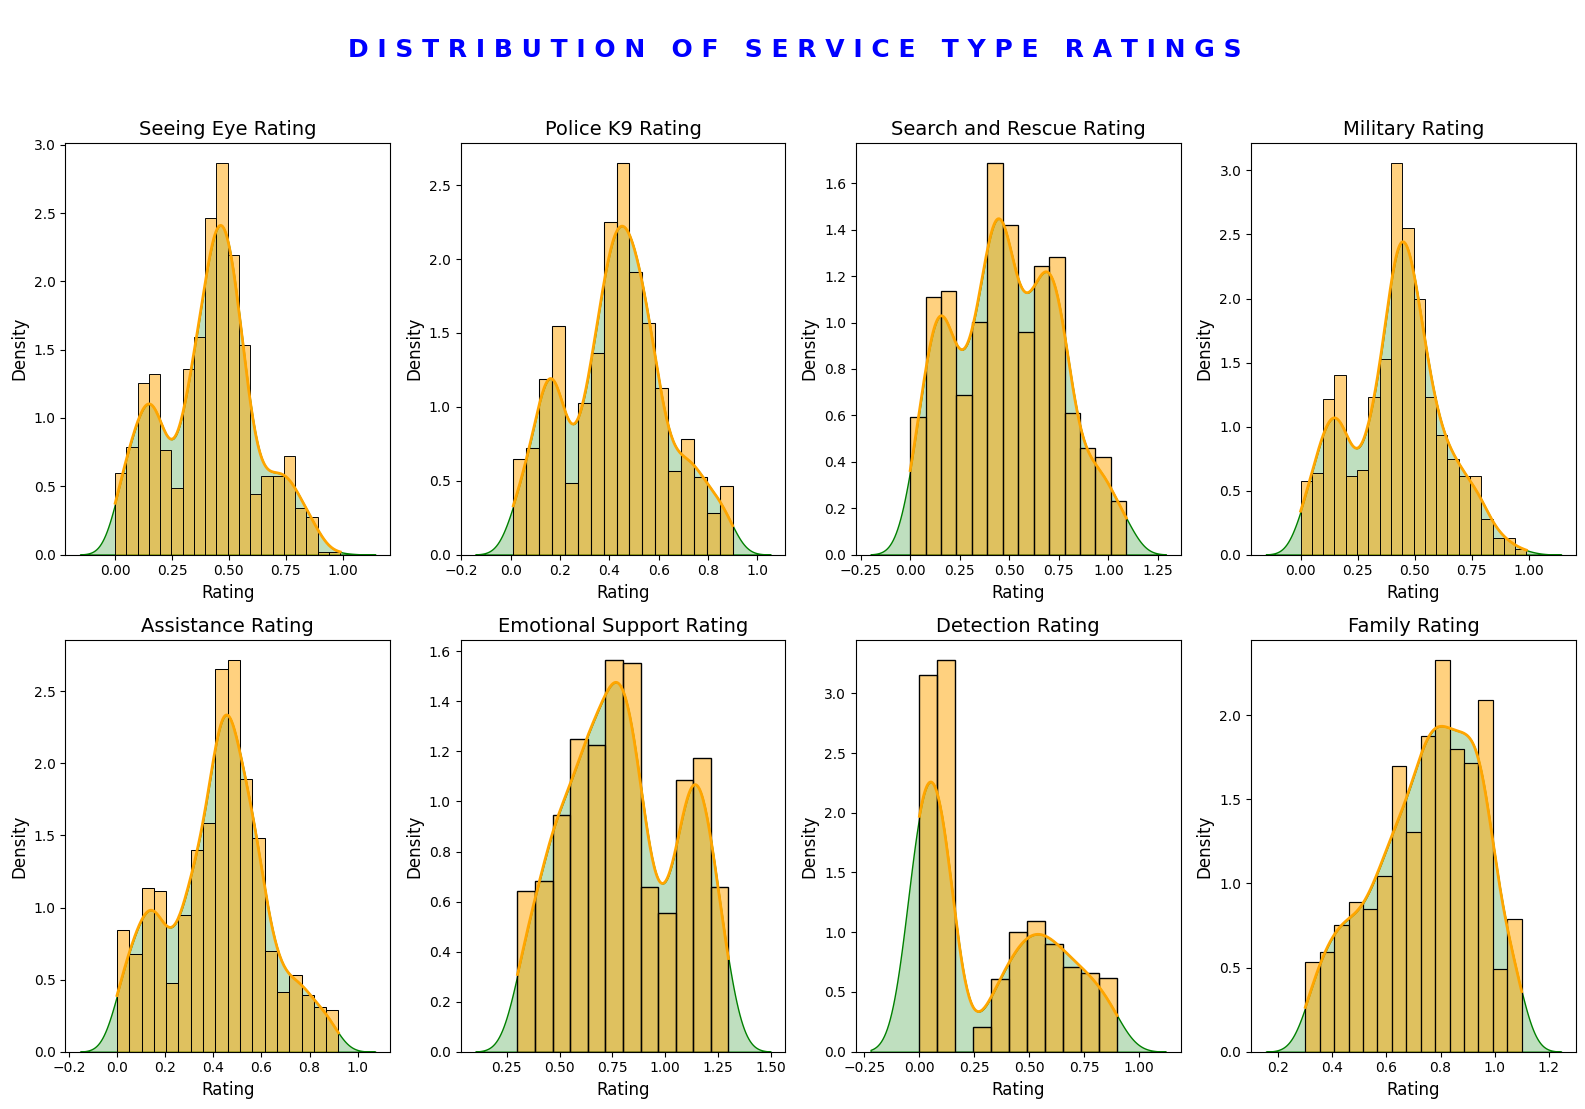

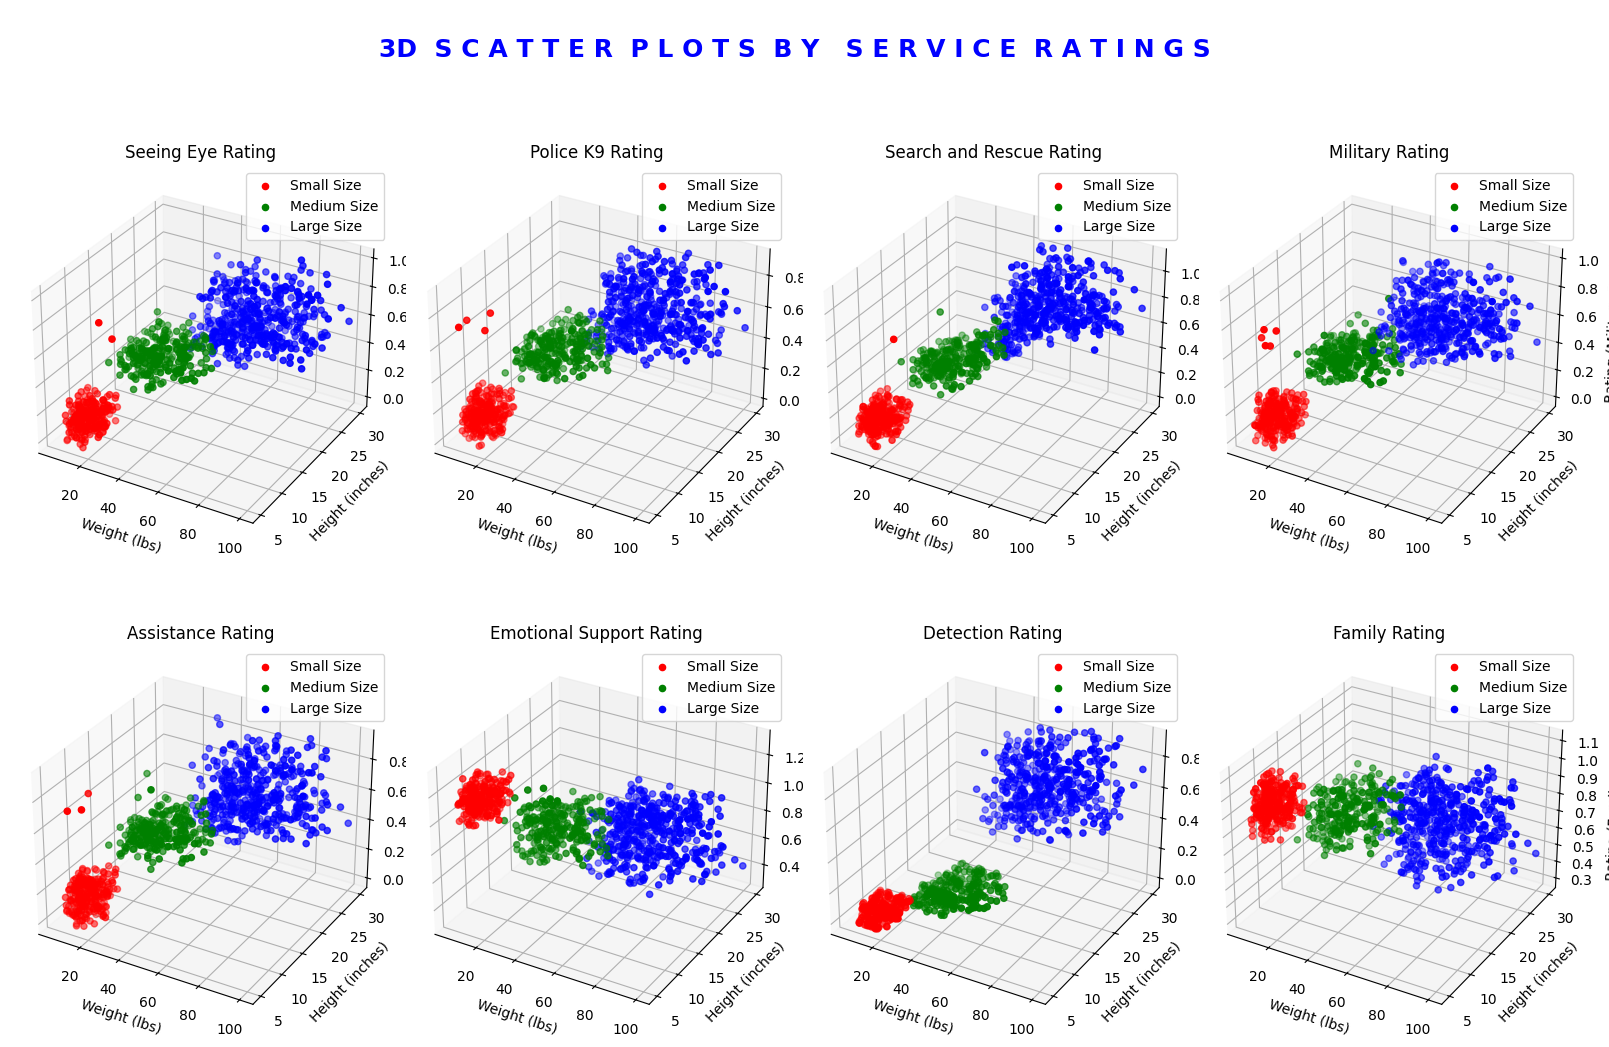

In [8]:
# Author: Uma Rao
# Class: ML 4375
# Project: Year-End Project
# This script is designed to generate synthetic data representing different breeds of dogs
# and their suitability for various service roles. The synthetic dataset aims to support
# machine learning models that predict the most suitable service roles based on breed characteristics.
#
# Observations:
# - The data generation process incorporates randomness to simulate a diverse dataset.
# - Different service ratings are assigned based on breed size and specific traits.
# - Visualization tools are employed to assess the distribution and correlations of generated data.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

 

####################################
# Synthetic Data Generator for Synthetic Dog Service Ratings
# This class creates a synthetic dataset representing dogs' suitability for various service roles.
####################################
class DogSynDataGenerator:

    # Initializes the data generator with a seed for reproducibility
    def __init__(self, seed=0):
        self.seed = seed
        np.random.seed(self.seed)
        self.service_types = [
            'Seeing Eye Rating', 'Police K9 Rating', 'Search and Rescue Rating',
            'Military Rating', 'Assistance Rating', 'Emotional Support Rating',
            'Detection Rating', 'Family Rating'
        ]
        self.breeds_large = ['B-L' + str(i) for i in range(1, 10)]
        self.breeds_medium = ['B-M' + str(i) for i in range(1, 6)]
        self.breeds_small = ['B-S' + str(i) for i in range(1, 6)]
        self.data = []
        self.print_title()

    # Displays the title of the dataset using matplotlib
    def print_title(self):
        title_text = "D O G   S Y N T H E T I C   D A T A   G E N E R A T O R"
        fig, ax = plt.subplots()
        ax.axis('off')
        ax.text(0.5, 0.5, title_text, fontsize=26, ha='center', va='center', fontweight='bold', color='blue')
        plt.show()

    # Generates synthetic data for a specific dog breed
    def generate_data_for_breed(self, breed, size, age_range, weight_range, height_range, num_records):
        for i in range(num_records):
            age = np.random.randint(age_range[0], age_range[1] + 1)
            # Increasing weight with age within the defined boundaries
            age_weight_factor = np.interp(age, [age_range[0], age_range[1]], [0.5, 1.0])  # Weight increases from 50% to 100% over the age range
            weight_base = np.random.uniform(weight_range[0], weight_range[1])
            weight = round(weight_base * age_weight_factor, 2)
            height = round(np.random.uniform(height_range[0], height_range[1]), 2)

            # Generate service ratings based on size-specific rules
            ratings = np.zeros(len(self.service_types))
            if size == 'Small':
                ratings[5] = np.random.uniform(0.8, 1.0)  # High 'Emotional Support Rating'
                ratings[7] = np.random.uniform(0.8, 1.0)  # High 'Family Rating'
                ratings[:5] = np.random.uniform(0.0, 0.2, 5)  # Extremely low for other service types
            elif size == 'Medium':
                ratings[5] = np.random.uniform(0.6, 0.9)  # Medium to high 'Emotional Support Rating'
                ratings[7] = np.random.uniform(0.6, 0.9)  # Medium to high 'Family Rating'
                ratings[:5] = np.random.uniform(0.3, 0.5, 5)  # Low to medium for other service types
            else:  # Large
                ratings = np.random.uniform(0.3, 0.8, len(self.service_types))  # Low to high rating for all service types
                if ratings[5] > 0.7:  # If 'Emotional Support Rating' is high
                    ratings[:5] = np.random.uniform(0.3, 0.5, 5)  # Low to medium for other service types
                if ratings[7] > 0.7:  # If 'Family Rating' is high
                    ratings[:5] = np.random.uniform(0.3, 0.5, 5)  # Low to medium for other service types

            # Adjust ratings based on age and other factors
            if age > 5:
                ratings += 0.1  # Older dogs get a slight boost for certain skills
            if weight > 50:
                ratings[2] += 0.2  # Boost for 'Search and Rescue Rating'
            if height < 12:
                ratings[5] += 0.2  # Boost for 'Emotional Support Rating'

            # Add some outliers
            if np.random.rand() < 0.05:  # 5% chance of an outlier
                if size == 'Small':
                    ratings[np.random.randint(0, 5)] = np.random.uniform(0.6, 0.8)  # Boost one of the low-rated service types
                elif size == 'Medium':
                    ratings[np.random.randint(0, 5)] = np.random.uniform(0.6, 0.8)  # Boost one of the low to medium-rated service types
                else:  # Large
                    ratings[np.random.randint(0, len(self.service_types))] = np.random.uniform(0.8, 1.0)  # Boost one of the service types

            ratings = np.round(ratings, 2)  # Ensure all ratings are rounded to two decimal places
            self.data.append([breed, size, i + 1, age, weight, height, *ratings])
    
    # Generates data for all breeds and sizes           
    def generate_data(self):
        num_records = 50
        age_range = (1, 10)
        weight_ranges = {'Small': (10, 30), 'Medium': (31, 60), 'Large': (61, 100)}
        height_ranges = {'Small': (5, 10), 'Medium': (11, 20), 'Large': (21, 30)}

        for size, breeds in zip(['Large', 'Medium', 'Small'], [self.breeds_large, self.breeds_medium, self.breeds_small]):
            weight_range = weight_ranges[size]
            height_range = height_ranges[size]
            for breed in breeds:
                self.generate_data_for_breed(breed, size, age_range, weight_range, height_range, num_records)

        self.df = pd.DataFrame(self.data, columns=['Dog Breed', 'Size', 'Dog ID', 'Age (Years)', 'Weight (lbs)', 'Height (inches)'] + self.service_types)
   
    
    # Save generated data to a CSV file
    def save_data(self, file_path):
        self.df.to_csv(file_path, index=False)
    
    # Loads data from a file or data source if the synthetic data is stored externally
    def load_data(self, file_path):
        return pd.read_csv(file_path)

    # Displays summary statistics and sample data in a formatted table    
    def display_data(self):
        stats = self.df.describe().transpose()

        # Prepare data for the table
        table_data = []
        for col, row in stats.iterrows():
            count, mean, std, min_, q1, q2, q3, max_ = row
            table_data.append([
                col.replace(" Rating", ""),  # Removing the suffix "Rating"
                int(count),  # Change to integer for better display
                round(mean, 2),
                round(std, 2),
                round(min_, 2),
                round(q1, 2),
                round(q2, 2),
                round(q3, 2),
                round(max_, 2)
            ])

        columns = ['Feature', 'Count', 'Mean', 'Std Dev', 'Min', '25th %ile', 'Median', '75th %ile', 'Max']
        # Plotting the table
        fig, ax = plt.subplots(figsize=(12, 3))  # Adjusted size for better layout
        ax.axis('off')  # Hide axes

        # Creating the table with specific cell and column colors
        table = ax.table(cellText=table_data,
                         colLabels=columns,
                         cellLoc='center',
                         loc='center',
                         colColours=['#56b5fd'] * len(columns),
                         colWidths=[0.17, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10])  # Adjusted column width for "Feature"
        table.auto_set_font_size(False)
        table.set_fontsize(12)  # Larger font size
        table.scale(1.4, 1.6)  # Adjust table scale for better readability
        
        # Apply bold formatting to the header cells
        for (i, key), cell in table.get_celld().items():
            if i == 0:  # Only header row is zero index
                cell.set_fontsize(12)  # Optionally set a larger font size
                cell.set_text_props(weight='bold')

        plt.title('D A T A   S U M M A R Y   A N D   S T A T I S T I C S', color='blue', fontsize=16, fontweight='bold', pad=80)
        
        plt.show()



    
    # Visualize distributions of numeric variables using histograms and KDE plots
    def visualize_distributions(self):
        plt.figure(figsize=(16, 12))
        plt.suptitle('\nD I S T R I B U T I O N   O F   N U M E R I C A L   V A R I A B L E S\n', color='blue', fontsize=18, fontweight='bold', y=0.95)
        plt.subplot(2, 2, 1)
        sns.histplot(data=self.df, x='Age (Years)', kde=True, color='green', bins=10)
        plt.title('Age Distribution', fontsize=14)
        plt.xlabel('Age (Years)', fontsize=12)
        plt.ylabel('Count', fontsize=12)

        plt.subplot(2, 2, 2)
        sns.histplot(data=self.df, x='Weight (lbs)', kde=True, color='blue', bins=10)
        plt.title('Weight Distribution', fontsize=14)
        plt.xlabel('Weight (lbs)', fontsize=12)
        plt.ylabel('Count', fontsize=12)

        plt.subplot(2, 2, 3)
        sns.histplot(data=self.df, x='Height (inches)', kde=True, color='orange', bins=10)
        plt.title('Height Distribution', fontsize=14)
        plt.xlabel('Height (inches)', fontsize=12)
        plt.ylabel('Count', fontsize=12)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    # Visualize distributions of service type ratings using KDE plots
    def visualize_service_types(self):
        plt.figure(figsize=(16, 12))
        plt.suptitle('\nD I S T R I B U T I O N   O F   S E R V I C E   T Y P E   R A T I N G S\n', color='blue', fontsize=18, fontweight='bold', y=0.95)
        for i, service_type in enumerate(self.service_types, start=1):
            plt.subplot(2, 4, i)
            sns.kdeplot(data=self.df, x=service_type, fill=True, color='green')
            sns.histplot(data=self.df, x=service_type, kde=True, color='orange', stat='density', line_kws={'linewidth': 2})
            plt.title(service_type, fontsize=14)
            plt.xlabel('Rating', fontsize=12)
            plt.ylabel('Density', fontsize=12)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    # Visualizes 3D scatter plots by service ratings   
    def visualize_service_ratings(self):
        fig=plt.figure(figsize=(16, 12))
        plt.suptitle('\n3D  S C A T T E R  P L O T S  B Y   S E R V I C E  R A T I N G S\n', color='blue', fontsize=18, fontweight='bold', y=0.95)
        
        for i, service_type in enumerate(self.service_types, 1):
            ax = fig.add_subplot(2, 4, i, projection='3d')
            for size, color in zip(['Small', 'Medium', 'Large'], ['red', 'green', 'blue']):
                subset = self.df[self.df['Size'] == size]
                ax.scatter(subset['Weight (lbs)'], subset['Height (inches)'], subset[service_type], color=color, label=f'{size} Size')
            ax.set_title(service_type)
            ax.set_xlabel('Weight (lbs)')
            ax.set_ylabel('Height (inches)')
            ax.set_zlabel(f'Rating ({service_type})')
            ax.legend()

        plt.tight_layout()
        plt.show()


        
####################################
# M A I N   M E T H O D
####################################
def main():
    
    # D A T A   G E N E R A T I O N
    
    # Generate the data into the csv file
    data_generator = DogSynDataGenerator(seed=0)
    data_generator.generate_data()
    data_generator.save_data('synthetic_dog_data.csv')

    # Generate data visualization
    data_generator.load_data('synthetic_dog_data.csv')
    data_generator.display_data()
    data_generator.visualize_distributions()
    data_generator.visualize_service_types()
    data_generator.visualize_service_ratings()
    
    
if __name__ == "__main__":
    main()